In [2]:
# -*- coding:utf-8 -*-
import matplotlib as mpl
import tushare as ts
import matplotlib.pyplot as plt
import mpl_finance as mpf
%matplotlib inline

In [3]:
wdyx = ts.get_k_data('002739','2017-01-01','2017-11-01')

In [4]:
# 导入两个涉及的库
from matplotlib.pylab import date2num
import datetime

# 对tushare获取到的数据转换成candlestick_ohlc()方法可读取的格式
'''
data_list = []
for dates,row in hist_data.iterrows():
    # 将时间转换为数字
    date_time = datetime.datetime.strptime(dates,'%Y-%m-%d')
    t = date2num(date_time)
    open,high,low,close = row[:4]
    datas = (t,open,high,low,close)
    data_list.append(datas)
'''
def date_to_num(dates):
    num_time = []
    for date in dates:
        date_time = datetime.datetime.strptime(date,'%Y-%m-%d')
        num_date = date2num(date_time)
        num_time.append(num_date)
    return num_time
print(wdyx.head(5))
wdyx=wdyx[['date','open','close','high','low','volume']]
print(wdyx.head(5))
# dataframe转换为二维数组
mat_wdyx = wdyx.as_matrix()
num_time = date_to_num(mat_wdyx[:,0])
mat_wdyx[:,0] = num_time
#         日期,   开盘,     收盘,    最高,      最低,   成交量,    代码

         date    open   close    high     low    volume    code
0  2017-01-03  35.868  35.908  35.934  35.670   30518.0  002739
1  2017-01-04  35.921  37.648  37.701  35.749  103953.0  002739
2  2017-01-05  37.390  37.582  37.907  37.139   65414.0  002739
3  2017-01-06  37.523  36.854  37.523  36.795   46286.0  002739
4  2017-01-09  36.696  36.530  36.841  36.153   37311.0  002739
         date    open   close    high     low    volume
0  2017-01-03  35.868  35.908  35.934  35.670   30518.0
1  2017-01-04  35.921  37.648  37.701  35.749  103953.0
2  2017-01-05  37.390  37.582  37.907  37.139   65414.0
3  2017-01-06  37.523  36.854  37.523  36.795   46286.0
4  2017-01-09  36.696  36.530  36.841  36.153   37311.0


/home/yunfeiz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


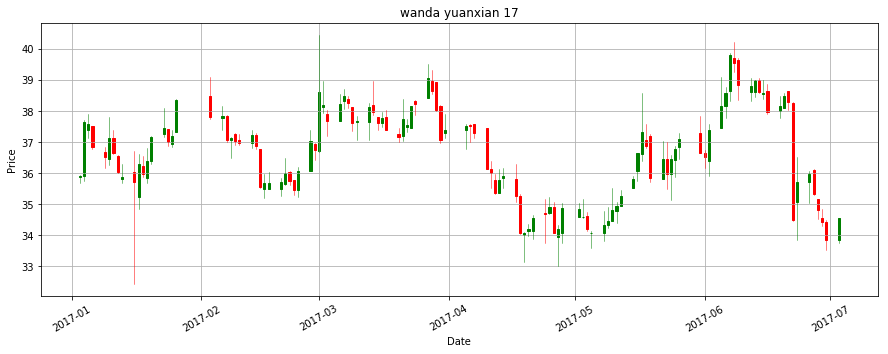

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
fig.subplots_adjust(bottom=0.5)
mpf.candlestick_ochl(ax, mat_wdyx, width=0.5, colorup='g', colordown='r', alpha=1.0)
plt.grid(True)
# 设置日期刻度旋转的角度 
plt.xticks(rotation=30)
plt.title('wanda yuanxian 17')
plt.xlabel('Date')
plt.ylabel('Price')
# x轴的刻度为日期
ax.xaxis_date ()
###candlestick_ochl()函数的参数
# ax 绘图Axes的实例
# mat_wdyx 价格历史数据
# width    图像中红绿矩形的宽度,代表天数
# colorup  收盘价格大于开盘价格时的颜色
# colordown   低于开盘价格时矩形的颜色
# alpha      矩形的颜色的透明度

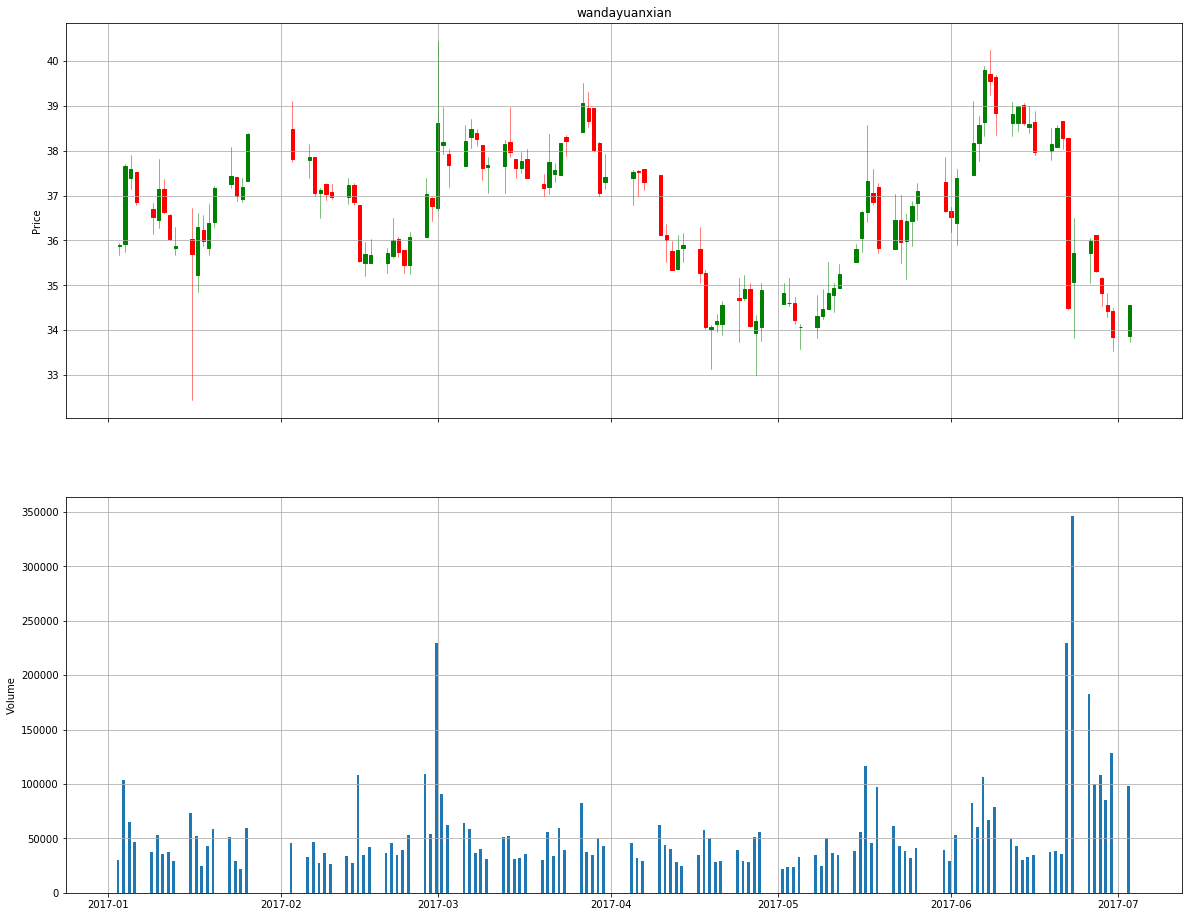

In [12]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(20,16))
mpf.candlestick_ochl(ax1, mat_wdyx, width=0.6, colorup = 'g', colordown = 'r')
ax1.set_title('wandayuanxian')
ax1.set_ylabel('Price')
ax1.grid(True)
ax1.xaxis_date()
plt.bar(mat_wdyx[:,0]-0.25, mat_wdyx[:,5], width= 0.5)
ax2.set_ylabel('Volume')
ax2.grid(True)